In [29]:
using LinearAlgebra 
using CSV
using Statistics
using Plots


In [30]:
# Lendo arquivo CSV e obtendo cada resposta como uma linha
arq = CSV.File("projfinal.csv")
n_linhas = length(arq)
M = zeros(n_linhas,15)
i=1
for linha in arq
    #Obtendo valores da linha no arquivo csv
    valores = []
    v = zeros(1,15)
    ordem = [10,3,15,8,4,12,2,6,9,11,1,5,7,13,14]
    for j in 2:16
        valores = [valores;linha[j]]
    end
    for j in 1:15
        v[ordem[j]]=valores[j]
    end
    # Adicionando valores lidos a matriz
    M[i,:] = v
    i+=1
end

# M são todas as matrizes respostas dispostas em linha

In [31]:
#Somando todas as linhas
soma = zeros(15)
for i in 1:n_linhas
    soma+=M[i,:]
end

#Construindo matriz com a média das avaliações
A = zeros(3,5)
for i in 1:length(soma)
    A[i]=soma[i]
end
A = A' * (1/n_linhas)
# Diminuindo todos os valores da matriz por 5, obtendo a matriz final
A=A - 5*(ones(5,3))

5×3 Matrix{Float64}:
 -4.0       -2.71429    4.47619
 -3.09524   -2.19048    3.33333
 -1.90476   -0.761905   2.19048
 -0.952381  -0.809524   0.666667
  1.52381    1.38095   -2.71429

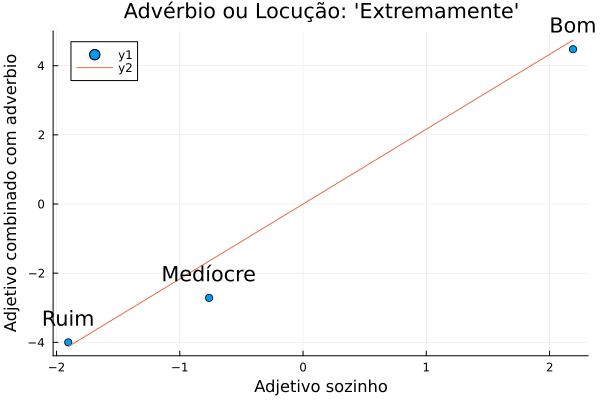

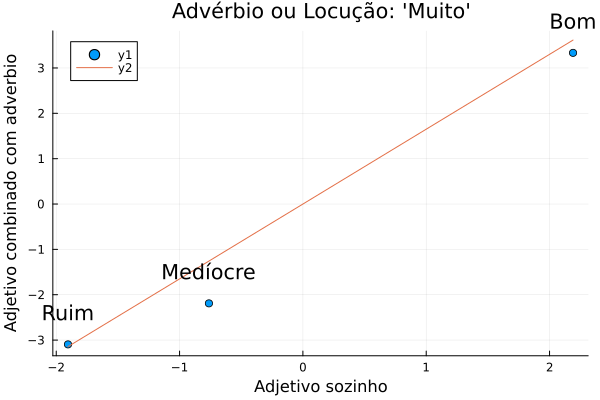

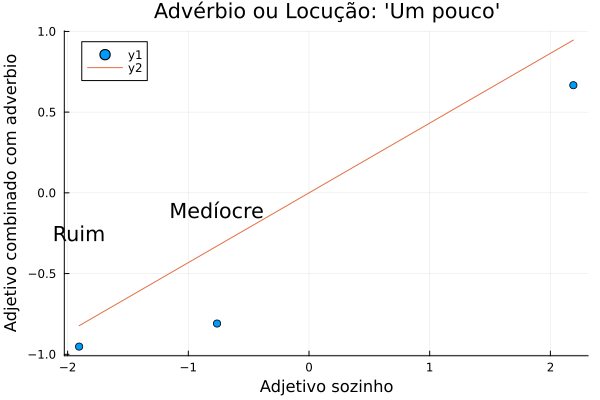

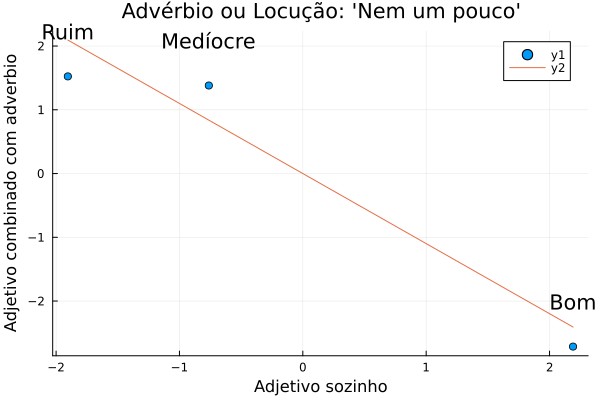

Matriz C:

5×2 Matrix{Float64}:
  2.16415   1.0
  1.65055   1.0
  1.0       1.0
  0.432024  1.0
 -1.09919   1.0

In [38]:
# Labels para plotagem e construção dos gráficos
adverbios = ["Extremamente","Muito","Um pouco","Nem um pouco"]
adjetivos = ["Ruim","Mediocre","Bom"]


            # MODELAGEM MAIS SIMPLES: Ci*Sj = Xij

# Receberá os coeficientes das regressões
coef = ones(5,2)
#Vetores representando valores de adjetivos combinados com um adverbio (linhas da matriz)
vetores_adv = Dict()
# Linha dos adjetivos sozinhos
adj_sozinho = A[3,:]

#Calculando coeficientes a partir dos adjetivos sozinhos
coef[:,1] = adj_sozinho\(A')
i=1
for adv in adverbios
    if i==3   i=4 end
    #Construindo dicionario 
    vetores_adv[adv] = A[i,:]
    
    p = scatter(A[3,:],vetores_adv[adv])
    annotate!(A[3,:],vetores_adv[adv]+[0.7,0.7,0.7],["Ruim","Medíocre","Bom"])
    plot!(title="Advérbio ou Locução: '"*adv*'\'')
    plot!(xlabel="Adjetivo sozinho")
    plot!(ylabel="Adjetivo combinado com adverbio")
    #plotando regressão linear
    plot!(adj_sozinho,(coef[i,:][1]*adj_sozinho))
    i+=1
        display(p)
     
end 
        
print("Matriz C:")
#Aqui estou usando só a primeira coluna de coef. A outra coluna, de 1s, está inclusa experimentalmente para testes, mas não é utilizada
display(coef[:,1])

In [39]:
#Pequenas explorações sobre mensuração de erros 
s = coef\A
i= 1

print("Matriz dos coeficientes adverbiais")
display(coef)

print("Matriz dos coeficientes dos adjetivos")
display(s)
print("Erros")
display(norm(A-coef*s))
print("\t erro para só o coeficiente")
display(norm(A-(coef[:,1]*adj_sozinho')))


Matriz dos coeficientes adverbiais

5×2 Matrix{Float64}:
  2.16415   1.0
  1.65055   1.0
  1.0       1.0
  0.432024  1.0
 -1.09919   1.0

Matriz dos coeficientes dos adjetivos

2×3 Matrix{Float64}:
 -1.692     -1.24053      2.20901
 -0.282189   0.00997864  -0.241911

Erros

0.6347313717605745

	 erro para só o coeficiente

1.7922151844237675

Matriz C:

5×2 Matrix{Float64}:
  2.21326   1.15164
  1.69196   1.13793
  1.0       0.0461485
  0.449104  0.939724
 -1.13818   0.638086

Matriz S:

2×3 Matrix{Float64}:
 -1.64238  -1.12833    2.19867
 -0.3104   -0.198293  -0.338884

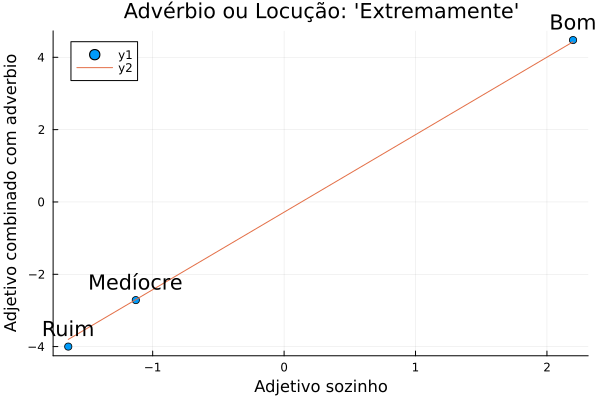

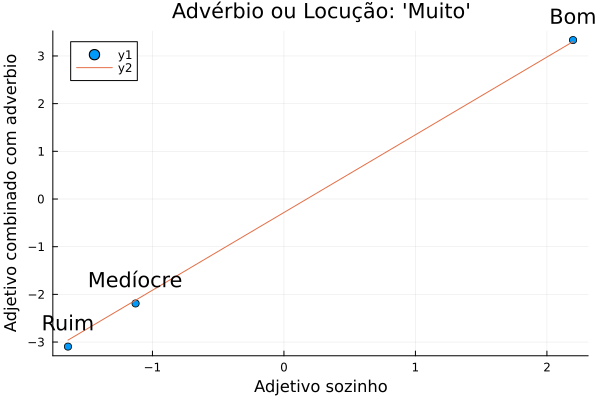

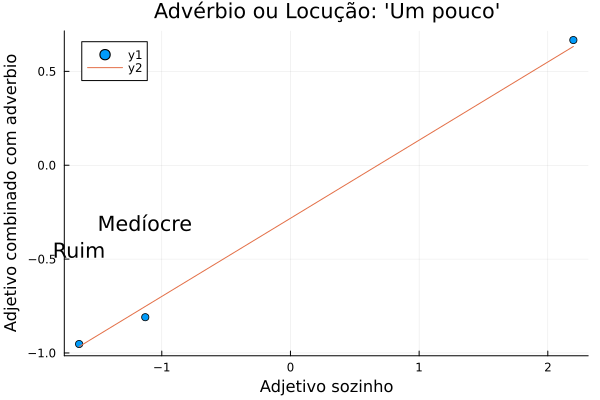

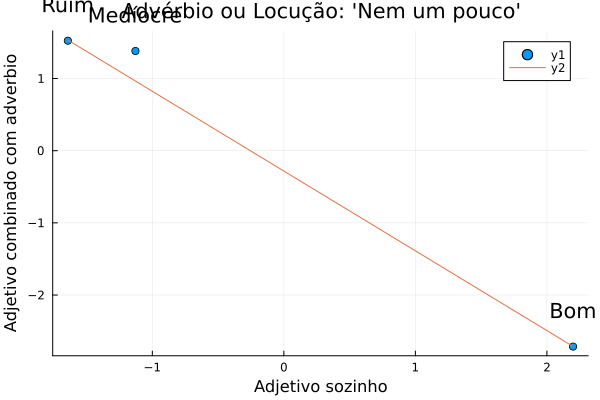

In [42]:
# Modelagem principal do artigo, a partir de aproximações P e Q de posto 2.
U,S,V  = svd(A)
P = U[:,1:2]*diagm([S[1],S[2]])
Q = V'[1:2,:]

#Definindo segunda coluna de T
tc2 = P\(ones(5,1))

#Definindo primeira coluna de T, dado que a linha 3 é a linha de Ci para os adjetivos sozinhos
Ps = [P[3,1] P[3,2]]
tc1 = Ps\[1]

#Construindo T,T⁻¹,C e S
T = hcat(tc1,tc2)
Ti = inv(T)
C = P*T
S = Ti*Q
print("Matriz C:")
display(C)
print("Matriz S:")
display(S)

#Definindo pontos para uma regressão linear a partir dos valores de S
pontos = ones(3,2)
pontos[:,1] = S[1,:]

i=1
for adv in adverbios
    if i==3 i=4 end
    #Vetor para regressao linear com média do intercepto K
    media = mean(S[2,:])
    vetor = [coef[i,:][1];media]
    
    p = scatter(S[1,:],vetores_adv[adv])
    annotate!(S[1,:],vetores_adv[adv]+[0.5,0.5,0.5],["Ruim","Medíocre","Bom"])
    plot!(title="Advérbio ou Locução: '"*adv*'\'')
    plot!(xlabel="Adjetivo sozinho")
    plot!(ylabel="Adjetivo combinado com adverbio")
    #Plotando regressão linear com interceptos aproximados
    plot!(S[1,:],(vetor'*pontos')')
    display(p)
    
    i+=1
end




In [43]:
# # Modelagem forçando os valores de 1 na segunda coluna de C.

# # Receberá os coeficientes das regressões
# coef = ones(5,2)
# adj_sozinho = A[3,:]
# # usarei uma regressao linear de grau maior agora
# # display(vandermonde(adj_sozinho,1))
# coef[:,1] = (vandermonde(adj_sozinho,1)\A')'[:,2]

# print("agora temos um coeficiente um pouco mais condizente, talvez, 
# mas o fato de nao termos um bom local de cruzamento do eixo y nos dará gráficos ruins")
# s = coef\A
# display(s)
# display(norm(A-(coef*s)))
# i=1
# s_med = hcat(s[1,:],[mean(s[2,:]) for i in 1:3])
# # display(s_med)
# pontos = ones(3,2)
# pontos[:,1] = s[1,:]
# # display(pontos)
# for adv in adverbios
#     if i==3 i=4 end

#     vetor = [coef[i,:][1];mean(s[2,:])]
    
#     p = scatter(s[1,:],vetores_adv[adv])
#     plot!(title="Advérbio ou Locução: '"*adv*'\'')
#     plot!(xlabel="Adjetivo sozinho")
#     plot!(ylabel="Adjetivo combinado com adverbio")
#     print("teste")
#     # display(vetor)
#     # display(pontos')
#     # display(vetor'*pontos'[:,1])
#     # display(coef[i,:])
#     # display(s_med)
#     # display(adj_sozinho)
#     plot!(s[1,:],(vetor'*pontos')')
#     display(p)
    
    
#     i+=1
# end
# display(coef)

In [18]:
# A = randn(5,3)
# k,n = size(A)
# U,S,Vt = svd(A)

# P = U[:,1:2]
# Q = Vt[1:2,:]
# s2 = S[1:2]
# P = P*diagm(s2)


function vandermonde(x_values,grau)
        l = size(x_values)[1]
        c = grau+1
        vandermonde = zeros(l,c)
    
        for i in 1:l  #para cada linha
            for j in 1:c
                vandermonde[i,j] = x_values[i]^(j-1)
            end
        end
        return vandermonde
    end

function onemphip(P)
    k,n = size(P)
    meio  = P * inv(P' * P) * P'
    return (ones(1,k)*meio*ones(k,1))[1] * (1/k)
end

function tcol2(P)
    m,n=size(P)
    fim = inv(P' * P) * P' * ones(m,1)
    return (1/onemphip(P)) * fim
end
function tirow2(Q)
    K = 5
    k,c = size(Q)
    fim = ones(1,c) * Q' * inv(Q * Q')
    return (K/onemphiq(Q)) * fim
end
function onemphiq(Q)
    k,n = size(Q)
    meio = Q' * inv(Q * Q') * Q
    return (ones(1,n) * meio * ones(n,1))[1] * (1/n)
end

function als(M,rank,smart)
    
    n,m = size(M)
    
    if smart
        L = randn(n,rank)
        L[:,rank]=ones(n,1)
    else
        L = randn(n,rank)
    end
    R = 1
    for i in 1:60
        R = (L\M)
        R[rank,:]= 5*ones(m,1)
        L = (R' \ M')'
        # print("r=",R)
    end
    return L,R
end
# display(onemphip(P))
# onemphiq(Q)
# # S = S[1:2]
# # P*diagm(S)*Q
# display(size(P))
# norm(A-(P*Q))

als (generic function with 1 method)

In [436]:
using JuMP
using Ipopt

# Given matrices
A_known = [-0.112269 -0.118518 0.0;
           0.00125843 -0.0216857 0.0;
           0.0 0.0 0.0]

B_known = [0.0 0.0 0.0;
           -8.20547 -2.76276 0.193313;
           0.0 0.0 1.0]

# Identity matrix
Id = I(3)

# Create a JuMP model and define variables
model = Model(Ipopt.Optimizer)
@variable(model, A[i=1:3, j=1:3])
@variable(model, B[i=1:3, j=1:3])

# Set known values in matrices A and B
for i in 1:3
    for j in 1:3
        if A_known[i, j] != 0
            @constraint(model, A[i, j] == A_known[i, j])
        end
        if B_known[i, j] != 0
            @constraint(model, B[i, j] == B_known[i, j])
        end
    end
end

# Define the objective function to minimize (using Frobenius norm)
@objective(model, Min, sum((A * B - Id)[i, j]^2 for i in 1:3, j in 1:3))

# Solve the optimization problem
optimize!(model)

# Retrieve the optimized values
A_optimized = value.(A)
B_optimized = value.(B)

# Print the result
println("Optimized Matrix A:")
display(A_optimized)
println("Optimized Matrix B:")
display(B_optimized)


This is Ipopt version 3.14.13, running with linear solver MUMPS 5.6.1.

Number of nonzeros in equality constraint Jacobian...:        8
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      117

Total number of variables............................:       18
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        8
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  3.0000000e+00 8.21e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

3×3 Matrix{Float64}:
 -0.112269    -0.118518   -0.000500422
  0.00125843  -0.0216857  -0.00771385
 87.1261       3.12155     2.41388

Optimized Matrix B:


3×3 Matrix{Float64}:
 -0.344027     3.45938  -0.0231542
 -8.20547     -2.76276   0.193313
 23.0283    -121.29      1.0

In [437]:

println("Optimized Matrix A:")
display(A_optimized)
println("Optimized Matrix B:")
display(B_optimized)
display(norm(A_optimized*B_optimized - I(3)))
To = A_optimized
Tio = B_optimized

Optimized Matrix A:


3×3 Matrix{Float64}:
 -0.112269    -0.118518   -0.000500422
  0.00125843  -0.0216857  -0.00771385
 87.1261       3.12155     2.41388

Optimized Matrix B:


3×3 Matrix{Float64}:
 -0.344027     3.45938  -0.0231542
 -8.20547     -2.76276   0.193313
 23.0283    -121.29      1.0

0.023996742445964364

3×3 Matrix{Float64}:
 -0.344027     3.45938  -0.0231542
 -8.20547     -2.76276   0.193313
 23.0283    -121.29      1.0